# Problem Statement

Welcome to your first week of work at the Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE). Time to get to work!

Due to the recent epidemic of West Nile Virus in the Windy City, we've had the Department of Public Health set up a surveillance and control system. We're hoping it will let us learn something from the mosquito population as we collect data over time. Pesticides are a necessary evil in the fight for public health and safety, not to mention expensive! We need to derive an effective plan to deploy pesticides throughout the city, and that is exactly where you come in!

# Imports and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

%matplotlib inline

In [2]:
train = pd.read_csv('./assets/train.csv')
test = pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
spray = pd.read_csv('./assets/spray.csv')

In [3]:
def create_lag_time(phenom):
    '''Creates a dataframe of a chosen column and time lags it 14 days vs the presence of West Nile Virus, and then
    plots the number of cases against each day.'''
    temp_df = pd.DataFrame()                           # temp dataframe to hold the lagged days
    temp_df['wnvpresent'] = train_comb['wnvpresent']
    temp_df[phenom] = train_comb[phenom]

    for n in range (1,15):                             # lag variable 14 times
        phenom_name = phenom + str(n)
        temp_df[phenom_name] = temp_df[phenom].shift(n)

    temp_df.dropna(inplace = True)                      # drop na rows from lag
    temp_df.reset_index(drop = 'first', inplace = True)
    
    return temp_df

In [4]:
def plot_graphs(list_of_variables, suptitle, fig_size):
    fig, axs = plt.subplots((len(list_of_variables)//2) + 1, 2, figsize = fig_size)
    fig.suptitle(suptitle, fontsize = 18)
    fig.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 3.0, rect = [0, 0, 1, 0.95]) 
    axs = axs.ravel()
    plot_count = 0
    for variable in list_of_variables:
        temp_df = create_lag_time(variable)
        axs[plot_count].bar(
            x = temp_df.drop(columns = 'wnvpresent').columns,
            height = temp_df[temp_df['wnvpresent'] == 1].drop(columns = 'wnvpresent').sum()
        )
        axs[plot_count].set_title(f'({variable}) vs Different Lag Times', 
                  fontsize = 8)
        axs[plot_count].set_ylabel('Number of West Nile Virus Cases', fontsize = 8)
        axs[plot_count].set_xlabel(f'{variable} Lag Times', fontsize = 8)
        plot_count += 1;

In [5]:
def clean_data(row):
    if ('M' in row) | ('T' in row):
        row = np.nan  # to impute
    return row

In [6]:
def adjust_columns(df):
    df.columns = df.columns.str.lower()
    
    df['date'] = pd.to_datetime(df['date'])
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    return df

# Data Cleaning

In [7]:
train = adjust_columns(train)
test = adjust_columns(test)
weather = adjust_columns(weather)
spray = adjust_columns(spray)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    10506 non-null  datetime64[ns]
 1   address                 10506 non-null  object        
 2   species                 10506 non-null  object        
 3   block                   10506 non-null  int64         
 4   street                  10506 non-null  object        
 5   trap                    10506 non-null  object        
 6   addressnumberandstreet  10506 non-null  object        
 7   latitude                10506 non-null  float64       
 8   longitude               10506 non-null  float64       
 9   addressaccuracy         10506 non-null  int64         
 10  nummosquitos            10506 non-null  int64         
 11  wnvpresent              10506 non-null  int64         
 12  day                     10506 non-null  int64 

In [9]:
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,day,month,year
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,29,5,2007
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,29,5,2007
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,29,5,2007


In [10]:
train.isnull().sum()

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
day                       0
month                     0
year                      0
dtype: int64

In [11]:
test.isnull().sum()

id                        0
date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
day                       0
month                     0
year                      0
dtype: int64

In [12]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   object        
 5   depart       2944 non-null   object        
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2944 non-null   object        
 8   heat         2944 non-null   object        
 9   cool         2944 non-null   object        
 10  sunrise      2944 non-null   object        
 11  sunset       2944 non-null   object        
 12  codesum      2944 non-null   object        
 13  depth        2944 non-null   object        
 14  water1       2944 non-null   object        
 15  snowfall     2944 non-null   object        
 16  precip

In [13]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       14835 non-null  datetime64[ns]
 1   time       14251 non-null  object        
 2   latitude   14835 non-null  float64       
 3   longitude  14835 non-null  float64       
 4   day        14835 non-null  int64         
 5   month      14835 non-null  int64         
 6   year       14835 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 811.4+ KB


In [14]:
train['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [15]:
train['trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

## Data Cleaning for Train

In [16]:
train['month'].value_counts(normalize=True)

8     0.357034
7     0.248049
9     0.211117
6     0.149534
10    0.026271
5     0.007995
Name: month, dtype: float64

In [17]:
train['addressaccuracy'].value_counts(normalize=True)

8    0.440510
9    0.378831
5    0.171997
3    0.008662
Name: addressaccuracy, dtype: float64

In [18]:
train[train['nummosquitos'] == 50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 293 to 10267
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1019 non-null   datetime64[ns]
 1   address                 1019 non-null   object        
 2   species                 1019 non-null   object        
 3   block                   1019 non-null   int64         
 4   street                  1019 non-null   object        
 5   trap                    1019 non-null   object        
 6   addressnumberandstreet  1019 non-null   object        
 7   latitude                1019 non-null   float64       
 8   longitude               1019 non-null   float64       
 9   addressaccuracy         1019 non-null   int64         
 10  nummosquitos            1019 non-null   int64         
 11  wnvpresent              1019 non-null   int64         
 12  day                     1019 non-null   int64

In [19]:
train[train['addressaccuracy'] == 3]

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,day,month,year
69,2007-06-05,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,3,0,5,6,2007
127,2007-06-26,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,26,6,2007
179,2007-06-29,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,29,6,2007
237,2007-07-02,"Chicago, IL, USA",CULEX SALINARIUS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,2,7,2007
342,2007-07-11,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,3,0,11,7,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10049,2013-09-06,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,10,0,6,9,2013
10050,2013-09-06,"Chicago, IL, USA",CULEX PIPIENS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,27,0,6,9,2013
10191,2013-09-12,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,12,9,2013
10326,2013-09-19,"Chicago, IL, USA",CULEX PIPIENS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,9,0,19,9,2013


In [20]:
train.duplicated().sum()

813

In [21]:
train.loc[train['nummosquitos'] != 50, :].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9487 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    9487 non-null   datetime64[ns]
 1   address                 9487 non-null   object        
 2   species                 9487 non-null   object        
 3   block                   9487 non-null   int64         
 4   street                  9487 non-null   object        
 5   trap                    9487 non-null   object        
 6   addressnumberandstreet  9487 non-null   object        
 7   latitude                9487 non-null   float64       
 8   longitude               9487 non-null   float64       
 9   addressaccuracy         9487 non-null   int64         
 10  nummosquitos            9487 non-null   int64         
 11  wnvpresent              9487 non-null   int64         
 12  day                     9487 non-null   int64  

In [22]:
train_clean = train.drop_duplicates(subset = ['date', 'species', 'latitude', 'longitude', 'address', 'trap', 'wnvpresent', 'nummosquitos'], keep = 'first')
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9693 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    9693 non-null   datetime64[ns]
 1   address                 9693 non-null   object        
 2   species                 9693 non-null   object        
 3   block                   9693 non-null   int64         
 4   street                  9693 non-null   object        
 5   trap                    9693 non-null   object        
 6   addressnumberandstreet  9693 non-null   object        
 7   latitude                9693 non-null   float64       
 8   longitude               9693 non-null   float64       
 9   addressaccuracy         9693 non-null   int64         
 10  nummosquitos            9693 non-null   int64         
 11  wnvpresent              9693 non-null   int64         
 12  day                     9693 non-null   int64  

Mosquito count capped at 50, additional mosquitos caught above that are made into a new record. We will group these records and sum them together to get the total number of mosquitos.

In [23]:
train_clean = train_clean.groupby(['date','address','species','block','street','trap','addressnumberandstreet','latitude','longitude','addressaccuracy','wnvpresent','day','month','year']).sum().reset_index()

In [24]:
train_clean

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,wnvpresent,day,month,year,nummosquitos
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,29,5,2007,1
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,29,5,2007,2
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,0,29,5,2007,1
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,0,29,5,2007,1
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,0,29,5,2007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2013-09-26,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,0,26,9,2013,6
8606,2013-09-26,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,0,26,9,2013,4
8607,2013-09-26,"South Vincennes Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S VINCENNES,T089,"1000 S VINCENNES, Chicago, IL",41.723195,-87.649970,5,0,26,9,2013,4
8608,2013-09-26,"University of Illinois at Chicago, 1100 South ...",CULEX PIPIENS/RESTUANS,11,S ASHLAND AVE,T090,"1100 S ASHLAND AVE, Chicago, IL",41.868077,-87.666901,9,0,26,9,2013,2


In [25]:
# train_clean.reset_index(drop = True, inplace = True)

In [26]:
train_clean.drop(columns = ['address', 'block', 'street', 'addressnumberandstreet'], inplace = True)

Since we already have latitude and longitude, we will drop the other address-related columns:
* address
* block
* street
* addressnumberandstreet

## Data Cleaning for Spray

In [27]:
spray['month'].value_counts(normalize=True)

8    0.538456
7    0.256758
9    0.204786
Name: month, dtype: float64

In [28]:
spray['longitude'].describe()

count    14835.000000
mean       -87.736690
std          0.067292
min        -88.096468
25%        -87.794225
50%        -87.727853
75%        -87.694108
max        -87.586727
Name: longitude, dtype: float64

In [29]:
train['longitude'].describe()

count    10506.000000
mean       -87.699908
std          0.096514
min        -87.930995
25%        -87.760070
50%        -87.694991
75%        -87.627796
max        -87.531635
Name: longitude, dtype: float64

<AxesSubplot:xlabel='longitude'>

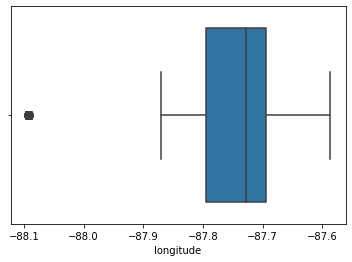

In [30]:
sns.boxplot(data=spray, x='longitude')

<AxesSubplot:xlabel='latitude'>

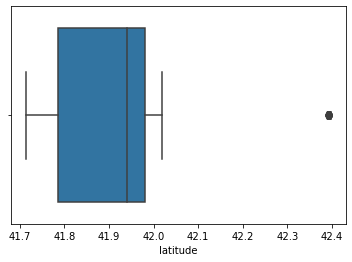

In [31]:
sns.boxplot(data=spray, x='latitude')

We notice there is an outlier for longitudinal data for spray. We will exclude these records.

In [32]:
# spray_clean = spray[spray['longitude'] > -88]
spray_clean = spray.loc[(spray['longitude'] > spray['longitude'].min() + (3* spray['longitude'].std())) & (spray['latitude'] <= spray['latitude'].max())]

In [33]:
spray_clean.describe()

,latitude,longitude,day,month,year
count,14740.000000,14740.000000,14740.000000,14740.000000,14740.000000
mean,41.901686,-87.734391,16.996947,7.947693,2012.713161
std,0.097077,0.061091,7.926638,0.679569,0.701024
min,41.713925,-87.871023,5.000000,7.000000,2011.000000
25%,41.784533,-87.794148,8.000000,7.000000,2013.000000
50%,41.939643,-87.727195,17.000000,8.000000,2013.000000
75%,41.980335,-87.693871,25.000000,8.000000,2013.000000
max,42.018907,-87.586727,29.000000,9.000000,2013.000000


In [34]:
spray_clean = spray_clean.drop_duplicates(keep = 'first')

In [35]:
spray_clean['spray'] = 1

We dropped the time column because time of day was not a concern. As long as the spray occurred 8-10 days prior, it would disrupt the mosquito lifecycle.

Considerations that might change it would be if we knew when precipitation ended. However, as this is not recorded on the weather forecast, we will assume that sprays occurred post-rainfall.

In [36]:
spray_clean = spray_clean.drop(columns = 'time')

## Data Cleaning for Weather

In [37]:
weather['month'].value_counts(normalize=True)

8     0.168478
10    0.168478
5     0.168478
7     0.168478
6     0.163043
9     0.163043
Name: month, dtype: float64

In [38]:
weather['water1'].value_counts()

M    2944
Name: water1, dtype: int64

We notice all of the data in `water1` is missing. This feature will not be useful, and hence will be dropped.

In [39]:
weather = weather.drop(columns = 'water1')

In [40]:
# check for missing or trace values based on data dict
weather.isin(['T', 'M']).sum()

station           0
date              0
tmax              0
tmin              0
tavg             11
depart         1472
dewpoint          0
wetbulb           4
heat             11
cool             11
sunrise           0
sunset            0
codesum           0
depth          1472
snowfall       1472
preciptotal       2
stnpressure       4
sealevel          9
resultspeed       0
resultdir         0
avgspeed          3
day               0
month             0
year              0
dtype: int64

### Imputing

####  Depth and Snowfall

In [41]:
weather['depth'].value_counts()

M    1472
0    1472
Name: depth, dtype: int64

In [42]:
weather['snowfall'].value_counts()

M      1472
0.0    1459
  T      12
0.1       1
Name: snowfall, dtype: int64

We will drop both depth and snowfall since most values are missing, 0 or trace.

In [43]:
weather.drop(columns = ['depth', 'snowfall'], inplace = True)

In [44]:
weather[['station','date','sunrise', 'sunset']]

,station,date,sunrise,sunset
0,1,2007-05-01,0448,1849
1,2,2007-05-01,-,-
2,1,2007-05-02,0447,1850
3,2,2007-05-02,-,-
4,1,2007-05-03,0446,1851
...,...,...,...,...
2939,2,2014-10-29,-,-
2940,1,2014-10-30,0622,1649
2941,2,2014-10-30,-,-
2942,1,2014-10-31,0623,1647


#### Sunrise and Sunset

In [45]:
# impute sunrise data with the data in the row above
for n in weather.index:
    if n % 2 == 1:
        weather['sunrise'][n] = weather['sunrise'][n-1]

<ipython-input-45-b0dc24ae8234>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['sunrise'][n] = weather['sunrise'][n-1]


In [46]:
# impute sunset data with the data in the row above
for n in weather.index:
    if n % 2 == 1:
        weather['sunset'][n] = weather['sunset'][n-1]

<ipython-input-46-d40f2b359dc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['sunset'][n] = weather['sunset'][n-1]


In [47]:
# convert sunrise and sunset columns to numbers
weather['sunrise'] = weather['sunrise'].astype(int)
weather['sunset'] = weather['sunset'].astype(int)

In [48]:
# to convert sunrise and sunset into number of mins from start of day
# subsequently we can feature engineer with total sunlight time (sunset - sunrise)
def get_duration(sun_time):
    hours = sun_time // 100  # hour value
    mins = sun_time % 100   # min value
    total_mins = hours * 60 + mins
    return total_mins

In [49]:
weather['sunrise_dur'] = weather['sunrise'].apply(get_duration)
weather['sunset_dur'] = weather['sunset'].apply(get_duration)

#### Average Temperature

In [50]:
def impute_tavg(row):
    if row['tavg'] == 'M':
        row['tavg'] = round((row['tmax'] + row['tmin']) / 2) 
    return row

In [51]:
weather = weather.apply(impute_tavg, axis=1)

In [52]:
weather['tavg'] = weather['tavg'].astype(int)

#### Heat and Cool

In [53]:
for row in weather.index:
    avg_temp = weather['tavg'][row] - 65
    if avg_temp >= 0:
        weather['cool'][row] = avg_temp
        weather['heat'][row] = 0
    if avg_temp < 0:
        weather['heat'][row] = abs(avg_temp)
        weather['cool'][row] = 0        

<ipython-input-53-2eeee7d08e47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['cool'][row] = avg_temp
<ipython-input-53-2eeee7d08e47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['heat'][row] = 0
<ipython-input-53-2eeee7d08e47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['heat'][row] = abs(avg_temp)
<ipython-input-53-2eeee7d08e47>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

#### Departure from Norm

In [54]:
weather.loc[weather['depart'].str.contains('M')].head(5)

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,day,month,year,sunrise_dur,sunset_dur
1,2,2007-05-01,84,52,68,M,51,57,0,3,448,1849,,0.00,29.18,29.82,2.7,25,9.6,1,5,2007,288,1129
3,2,2007-05-02,60,43,52,M,42,47,13,0,447,1850,BR HZ,0.00,29.44,30.08,13.3,2,13.4,2,5,2007,287,1130
5,2,2007-05-03,67,48,58,M,40,50,7,0,446,1851,HZ,0.00,29.46,30.12,12.9,6,13.2,3,5,2007,286,1131
7,2,2007-05-04,78,51,64,M,42,50,1,0,444,1852,,0.00,29.36,30.04,10.1,7,10.4,4,5,2007,284,1132
9,2,2007-05-05,66,54,60,M,39,50,5,0,443,1853,,T,29.46,30.09,11.2,7,11.5,5,5,2007,283,1133


In [55]:
weather.loc[(weather['depart'].str.contains('M')) &
            (weather['station'] == 1)]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,day,month,year,sunrise_dur,sunset_dur


We see that all the missing values in the Depart column are found in Station 2 only.

Based on the data dictionary, Depart means the departure from normal temperature.

In order to impute the missing values here, we suggest to:
1. Take the 'Tavg' difference between both stations for each day 
2. Add this difference to the Station 1's 'Depart' value to calculate Station 2's 'Depart' value

In [56]:
weather.loc[[1], 'depart']

1    M
Name: depart, dtype: object

In [57]:
def impute_depart(row):
    if row['station'] == 2:
        diff = row['tavg'] - int(weather.loc[(weather['date'] == row['date']) &
                                         (weather['station'] == 1),
                                         'tavg'])
        
        row['depart'] = diff + int(weather.loc[(weather['date'] == row['date']) &
                                           (weather['station'] == 1), 
                                           'depart'])
        
    return row

In [58]:
weather = weather.apply(impute_depart, axis=1)

#### Wetbulb

In [59]:
def check_value(df, col, station_1_idx):
    if ((df.loc[station_1_idx][col] in ['M','T']) & (df.loc[station_1_idx+1][col] in ['M','T'])):
        return True
    else:
        return False

In [60]:
def impute_data(df, col):
    df_1 = df.loc[(df['station'] == 1) & (~df[col].str.strip().isin(['M','T'])),col].astype(float)
    df_2 = df.loc[(df['station'] == 2) & (~df[col].str.strip().isin(['M','T'])),col].astype(float)
    mean_diff = df_1.mean() - df_2.mean()
    
    idx = list(df.loc[(df[col].str.strip().isin(['M']))].index)
    
    for i in idx:
        if df.loc[i]['station'] == 1:
            if check_value(df, col, i):
                new_val = (float(df.loc[i+2][col]) + float(df.loc[i-2][col])) / 2
                df.at[i,col] = new_val
                df.at[i+1,col] = new_val
                idx.remove(i)
                idx.remove(i+1)
            else:
                df.at[i,col] = float(df.loc[i+1][col]) + mean_diff
        else:
            df.at[i,col] = float(df.loc[i-1][col]) + mean_diff
    
    zero_idx = list(df.loc[(df[col].str.strip().isin(['T']))].index)
    for i in zero_idx:
        df.at[i,col] = 0
    
    return df

In [61]:
weather = impute_data(weather, 'wetbulb')

#### Total Precipitation

In [62]:
weather = impute_data(weather, 'preciptotal')

#### Station Pressure

In [63]:
weather = impute_data(weather, 'stnpressure')

#### Average Speed

In [64]:
weather = impute_data(weather, 'avgspeed')

#### Sea Level

In [65]:
weather = impute_data(weather,'sealevel')

## Vectorizing Weather Phenomena

In [66]:
weather['codesum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer()
we_types = cvec.fit_transform(weather['codesum'])

In [68]:
we_types = pd.DataFrame(
    we_types.todense(),
    columns = cvec.get_feature_names()
            )

In [69]:
for row in range(len(we_types)):
    if we_types['tsra'][row] == 1:
        we_types['ts'][row] = 1
        we_types['ra'][row] = 1

we_types.drop(columns = 'tsra', inplace = True)

In [70]:
we_types.sum().sort_values(ascending = False)

ra      1035
br       813
ts       345
hz       263
dz       133
fg        43
vcts      19
fu         9
sn         6
bcfg       5
vcfg       4
mifg       3
sq         3
gr         1
dtype: int64

In [71]:
we_types

,bcfg,br,dz,fg,fu,gr,hz,mifg,ra,sn,sq,ts,vcfg,vcts
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2940,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2941,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2942,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [72]:
weather.drop(columns = 'codesum', inplace = True)

In [73]:
weather_clean = pd.concat(
    objs = [weather, we_types],
    axis = 1
)

## Numericizing Columns

In [74]:
weather_clean.isin(['M','T']).sum()

station        0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
day            0
month          0
year           0
sunrise_dur    0
sunset_dur     0
bcfg           0
br             0
dz             0
fg             0
fu             0
gr             0
hz             0
mifg           0
ra             0
sn             0
sq             0
ts             0
vcfg           0
vcts           0
dtype: int64

In [75]:
num_list = ['depart', 'wetbulb', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed']
for col in num_list:
    weather_clean[col] = weather_clean[col].map(lambda x: float(x))

In [76]:
weather_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   int64         
 5   depart       2944 non-null   float64       
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2944 non-null   float64       
 8   heat         2944 non-null   int64         
 9   cool         2944 non-null   int64         
 10  sunrise      2944 non-null   int64         
 11  sunset       2944 non-null   int64         
 12  preciptotal  2944 non-null   float64       
 13  stnpressure  2944 non-null   float64       
 14  sealevel     2944 non-null   float64       
 15  resultspeed  2944 non-null   float64       
 16  result

## Combine Train and Weather, Spray and Weather

In [77]:
train_comb = train_clean.merge(
    weather_clean, 
    how='left', 
    on = ['date', 'day', 'month', 'year'])

In [78]:
train_comb_outer = train_clean.merge(
    weather_clean, 
    how='outer', 
    on = ['date', 'day', 'month', 'year'])

In [79]:
train_comb = train_comb.set_index('date').sort_index()
spray_clean = spray_clean.set_index('date').sort_index()
train_comb_outer = train_comb_outer.set_index('date').sort_index()

# Exploratory Data Analysis

Based on this [CDC link](https://www.cdc.gov/dengue/resources/factsheets/mosquitolifecyclefinal.pdf), the entire lifecycle of a mosquito (from egg to adult) takes approximately 8-10 days.

This [link](https://www.preventivepestcontrol.com/weather-affect-mosquito-activity/) discusses about the type of weather favored by mosquitoes. Mosquitoes enjoy wet and warm climates and are most active in temperatures above 80 degrees. Conversely, when temperatures go below 50 degrees, mosquitoes go dormant.   

This [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3939474/) discusses the several symptoms (while extremely) of WNV. In general, 80% of persons infected with WNV remain asymptomatic. Of those who develop symptoms, the vast majority develop an acute, systemic febrile illness (“West Nile fever”, WNF). Data suggest that less than 1% of infected persons develop neurologic illness, which is primarily attributed to neuroinvasive disease. However, it is noted that the WNV continues to spread across US and will likely be a constant year-around presence. The need for effective vaccines and treatments is increasing in importance as this disease continues to expand its range and increase in severity.

## Presence of West Nile Virus in Mosquito Species

### Frequency of mosquitoes over the years (by species)

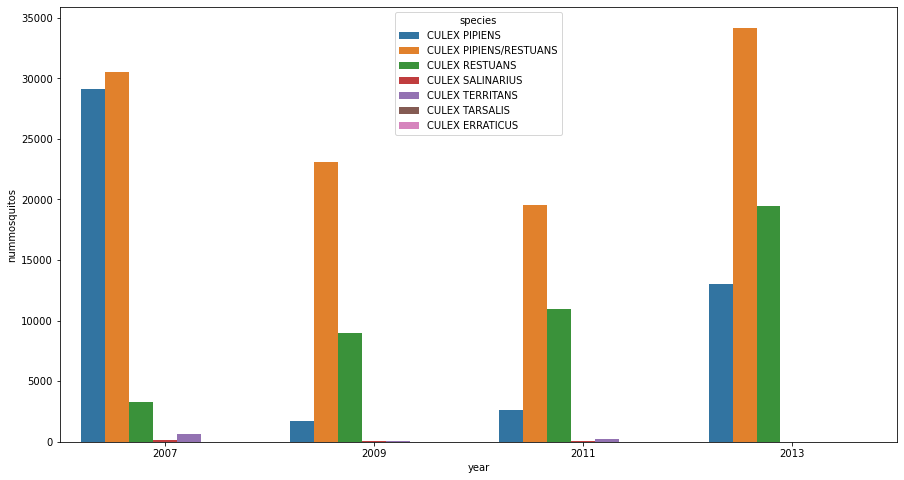

In [80]:
# To show and focus on WNVPresent only?

plt.figure(figsize=(15,8))
sns.barplot(data=train_comb.groupby(['year', 'species'])['nummosquitos'].sum().reset_index(),
            x='year',
            y='nummosquitos',
            hue='species');

### Likelihood of Presence of West Nile Virus by Species

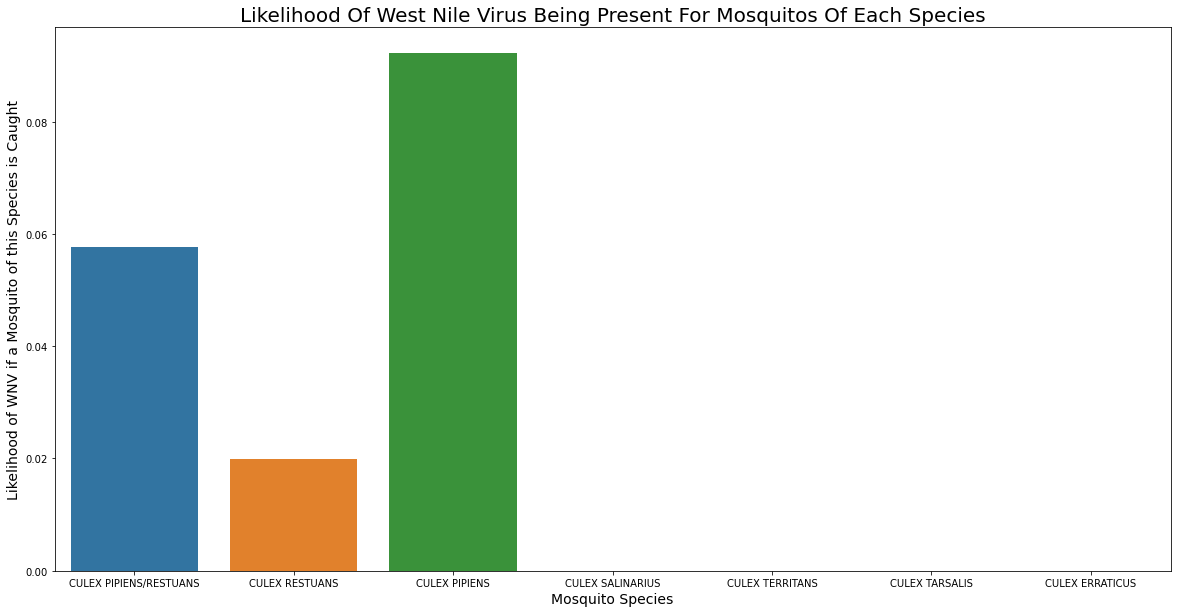

In [81]:
mos_prob = {}
mos_species = [name for name in train_comb['species'].unique()]
for mos in mos_species:
    prob = train_comb.loc[train_comb['species'] == mos, 'wnvpresent'].value_counts(normalize = True)[0]
    if prob == 1:
        mos_prob[mos] = 0
    else:
        mos_prob[mos] = (1 - prob)
        
mos_prob = pd.DataFrame(
    mos_prob.items(),
    columns = ['species', 'prob']
)

plt.figure(figsize=(20,10))
plt.title('Likelihood Of West Nile Virus Being Present For Mosquitos Of Each Species', fontsize = 20)
sns.barplot(
    data = mos_prob,
    x = 'species',
    y = 'prob'
)
plt.ylabel('Likelihood of WNV if a Mosquito of this Species is Caught', fontsize = 14)
plt.xlabel('Mosquito Species', fontsize = 14);

### Mosquito Transmission of West Nile Virus

Only Culex Pipiens and Culex Restuans are associated with positive west nile virus cases. For the purposes of this model, we will drop the other breeds of mosquitos as there are no positive cases to train the model upon.

In [82]:
train_comb = train_comb.loc[(train_comb['species'] == 'CULEX PIPIENS')|
                            (train_comb['species'] == 'CULEX PIPIENS/RESTUANS')|
                            (train_comb['species'] == 'CULEX RESTUANS')
                            , :]

In [83]:
def plot_trap_spray_wnv(train, spray):
    #plt.figure(figsize=(12,16))
    origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
    upperRight = [42.1, -87.5]          # lat/long of upper right corner

    mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

    train_2011 = train.loc[(train['year'] == 2011) & (train['wnvpresent'] == 0),:]
    train_2013 = train.loc[(train['year'] == 2013) & (train['wnvpresent'] == 0),:]
    
    train_2011_wnv = train.loc[(train['year'] == 2011) & (train['wnvpresent'] == 1),:]
    train_2013_wnv = train.loc[(train['year'] == 2013) & (train['wnvpresent'] == 1),:]
    
    spray_2011 = spray.loc[(spray['year'] == 2011),:]
    spray_2013 = spray.loc[(spray['year'] == 2013),:]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17,15))
    ax[0].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
    ax[1].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
    
    ax[0].scatter(x=spray_2011['longitude'], y=spray_2011['latitude'], c='yellow', s=10, alpha = 0.2)
    ax[0].scatter(x=train_2011['longitude'], y=train_2011['latitude'], c='b', s=15, marker='s')
    ax[0].scatter(x=train_2011_wnv['longitude'], y=train_2011_wnv['latitude'], c='r', s=15, marker='+');
    ax[0].title.set_text('2011 Spray Locations vs Mosquito Traps')

    ax[1].scatter(x=spray_2013['longitude'], y=spray_2013['latitude'], c='yellow', s=10, alpha = 0.2)
    ax[1].scatter(x=train_2013['longitude'], y=train_2013['latitude'], c='b', s=15, marker='s')
    ax[1].scatter(x=train_2013_wnv['longitude'], y=train_2013_wnv['latitude'], c='r', s=15, marker='+');
    ax[1].title.set_text('2013 Spray Locations vs Mosquito Traps')
    

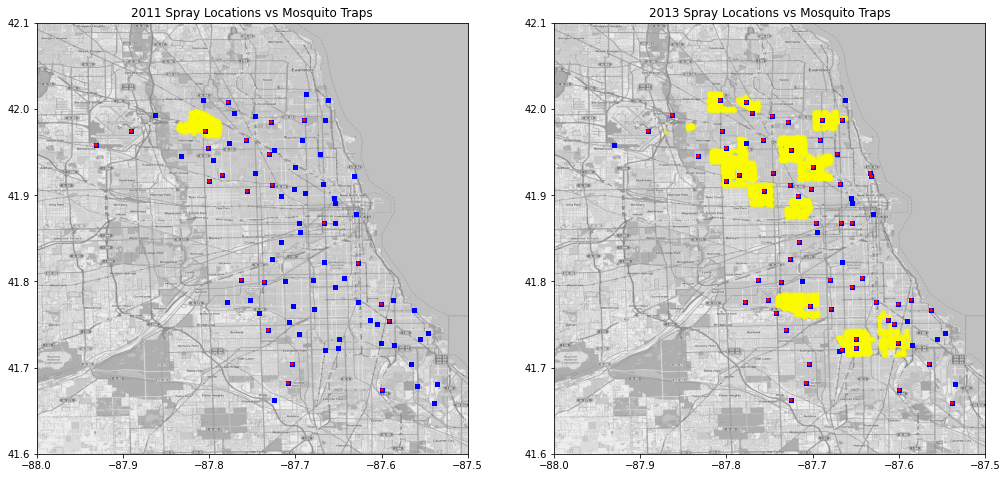

In [84]:
plot_trap_spray_wnv(train_clean, spray_clean)

## Spray Data Analysis

In [85]:
start_date = pd.to_datetime('2011-09-07') - pd.to_timedelta(5, unit='d')
start_date

Timestamp('2011-09-02 00:00:00')

In [86]:
def spray_plot(date):
    '''Plots total number of mosquitoes caught from 1 week priod to 4 weeks post-spray 
    from the traps within a spray zone''' 
    max_lat = max(spray_clean.loc[spray_clean.index == date, 'latitude'])
    min_lat = min(spray_clean.loc[spray_clean.index == date, 'latitude'])
    max_long = max(spray_clean.loc[spray_clean.index == date, 'longitude'])
    min_long = min(spray_clean.loc[spray_clean.index == date, 'longitude'])
    
    start_date = pd.to_datetime(date) - pd.to_timedelta(7, unit='d') # start 7 days prior
    end_date = pd.to_datetime(date) + pd.to_timedelta(28, unit='d') # increase date by 28 day
    
    mask = (train_comb.index > start_date) & (train_comb.index <= end_date)
    train_tempdf = train_comb.loc[mask]
    
    weekly_mos_count = train_tempdf.loc[((train_tempdf['longitude'] <= max_long) &
                                         (train_tempdf['longitude'] >= min_long) &
                                         (train_tempdf['latitude'] <= max_lat) &
                                         (train_tempdf['latitude'] >= min_lat))
                                         ,['nummosquitos']].groupby('date').sum()
    
    spray_8 = pd.to_datetime(date) - pd.to_timedelta(8, unit='d')
    spray_10 = pd.to_datetime(date) - pd.to_timedelta(10, unit='d')
    print(f'Date Range of Day 8-10 Pre-Spray is {spray_8}, {spray_10}.')
    plt.figure(figsize=(6,4))
    plt.title(f'Number of Mosquitos Caught In Spray Zone, Sprayed: ({date})')
    plt.ylabel('Num of Mosquitos')
    plt.xlabel(f'Date Range from {start_date} & {end_date}')
    sns.barplot(
        data = weekly_mos_count,
        x = weekly_mos_count.index,
        y = 'nummosquitos',
    )
    plt.show()
    
def spray_tables(date):
    '''Prints a table indicating the number of mosquitos caught and various variables from traps 
    11 days prior to 11 days post-spray'''
    max_lat = max(spray_clean.loc[spray_clean.index == date, 'latitude'])
    min_lat = min(spray_clean.loc[spray_clean.index == date, 'latitude'])
    max_long = max(spray_clean.loc[spray_clean.index == date, 'longitude'])
    min_long = min(spray_clean.loc[spray_clean.index == date, 'longitude'])
    
    start_date = pd.to_datetime(date) - pd.to_timedelta(11, unit='d') # start 11 days prior
    end_date = pd.to_datetime(date) + pd.to_timedelta(11, unit='d') # increase date by 11 day
    
    mask = (train_comb_outer.index > start_date) & (train_comb_outer.index <= end_date)
    train_tempdf = train_comb_outer.loc[mask]
    
    train_tempdf['preciptotal'] = train_tempdf['preciptotal'].astype(float)
    train_tempdf['deg_days'] = (train_tempdf['tavg'] - 65)
    
    weekly_mos_count = train_tempdf.loc[((train_tempdf['longitude'] <= max_long) &
                                         (train_tempdf['longitude'] >= min_long) &
                                         (train_tempdf['latitude'] <= max_lat) &
                                         (train_tempdf['latitude'] >= min_lat))
                                         , 'nummosquitos'].groupby('date').sum()
    
    train_tempdf['day_of_week'] = pd.DatetimeIndex(train_tempdf.index).day_name()
    train_tempdf = train_tempdf[['day_of_week', 'ra', 'preciptotal', 'resultspeed', 
                                 'deg_days']].groupby(['date', 'day_of_week']).mean().join(weekly_mos_count)
    
    print(f'For Spray Date: {date}')
    print(train_tempdf)
    
    
    spray_8 = pd.to_datetime(date) - pd.to_timedelta(8, unit='d')
    spray_10 = pd.to_datetime(date) - pd.to_timedelta(10, unit='d')
    print(f'\nDate Range of Day 8-10 Pre-Spray is {spray_8}, {spray_10}.')
    print('\n------------------------------\n')

### Spray Dates & Effectiveness

Date Range of Day 8-10 Pre-Spray is 2011-08-30 00:00:00, 2011-08-28 00:00:00.


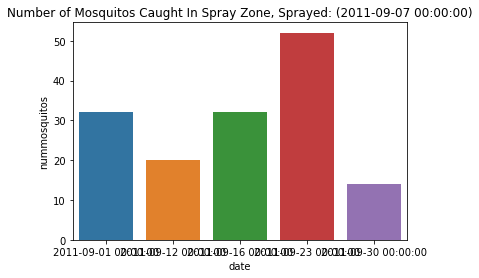

Date Range of Day 8-10 Pre-Spray is 2013-07-09 00:00:00, 2013-07-07 00:00:00.


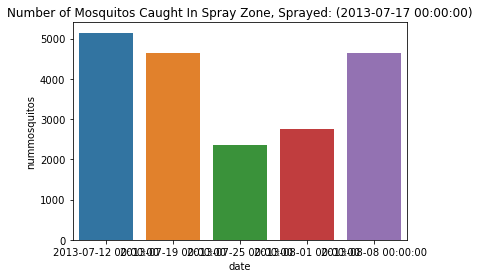

Date Range of Day 8-10 Pre-Spray is 2013-07-17 00:00:00, 2013-07-15 00:00:00.


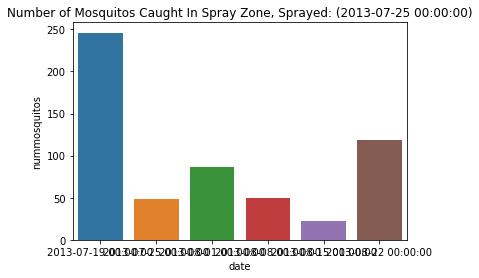

Date Range of Day 8-10 Pre-Spray is 2013-07-31 00:00:00, 2013-07-29 00:00:00.


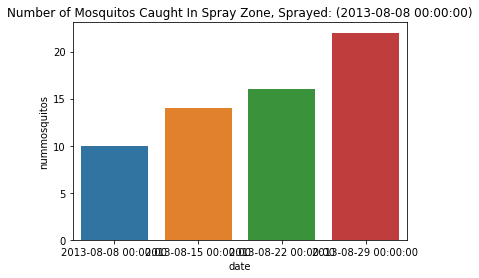

Date Range of Day 8-10 Pre-Spray is 2013-08-07 00:00:00, 2013-08-05 00:00:00.


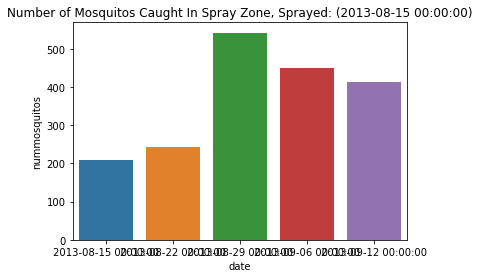

Date Range of Day 8-10 Pre-Spray is 2013-08-08 00:00:00, 2013-08-06 00:00:00.


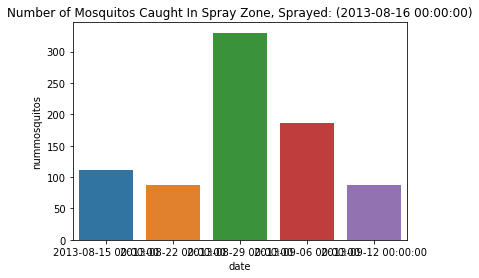

Date Range of Day 8-10 Pre-Spray is 2013-08-14 00:00:00, 2013-08-12 00:00:00.


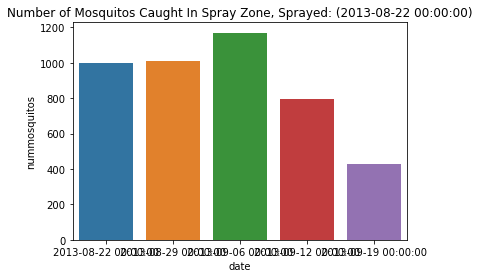

Date Range of Day 8-10 Pre-Spray is 2013-08-21 00:00:00, 2013-08-19 00:00:00.


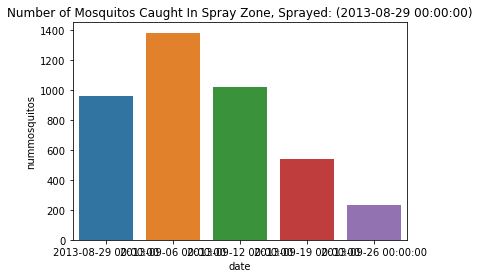

Date Range of Day 8-10 Pre-Spray is 2013-08-28 00:00:00, 2013-08-26 00:00:00.


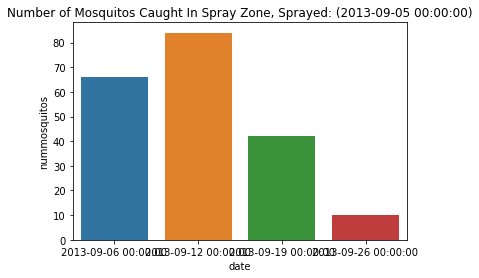

In [87]:
for date in spray_clean.index.unique():
    spray_plot(date)

In [91]:
for date in spray_clean.index.unique():
    spray_tables(date)

For Spray Date: 2011-09-07 00:00:00
                         ra  preciptotal  resultspeed  deg_days  nummosquitos
date       day_of_week                                                       
2011-08-28 Sunday       0.0        0.000         7.75       4.0           NaN
2011-08-29 Monday       0.0        0.000         1.25       4.5           NaN
2011-08-30 Tuesday      1.0        0.030         5.60       5.5           NaN
2011-08-31 Wednesday    0.5        0.025         5.40      11.5           NaN
2011-09-01 Thursday     0.0        0.000         5.50      18.0          32.0
2011-09-02 Friday       0.0        0.000         4.45      20.5           NaN
2011-09-03 Saturday     0.5        0.085         1.85      14.0           NaN
2011-09-04 Sunday       0.5        0.000        10.60       1.5           NaN
2011-09-05 Monday       0.0        0.000        15.05      -5.5           NaN
2011-09-06 Tuesday      0.0        0.000        11.65      -4.5           NaN
2011-09-07 Wednesday    0.0 

<ipython-input-90-42a4db75cad6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tempdf['preciptotal'] = train_tempdf['preciptotal'].astype(float)
<ipython-input-90-42a4db75cad6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tempdf['deg_days'] = (train_tempdf['tavg'] - 65)
<ipython-input-90-42a4db75cad6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

Mosquito lifecycles for Culex Pipiens, the most common mosquito caught, <a href='https://www.in.gov/health/erc/zoonotic-and-vectorborne-epidemiology-entomology/pests/culex-species-mosquitoes/'>typically range from 2-4 weeks, and even less than a week in the heat of summer</a>.

For this reason, data was compared for 28 days after sprays to the last collection 7 days prior.

According to the WHO, <a href='https://www.who.int/westernpacific/about/how-we-work/pacific-support/news/detail/05-05-2014-mosquito-fogging-will-not-harm-you-reminds-who-and-solomon-islands-ministry-of-health'>spray effectiveness only lasts the day it is sprayed</a>. Therefore, if effects of the spray can only be analysed if it is applied Monday to Wednesday, following which, results would be seen in the number of mosquitos caught when recorded during the rest of the week.

In an examination of the spray effectiveness between the two dates, we see that mosquito populations post-sprays did not often react predictably in a comparison pre-spraying and post-spraying. As the sprays do occur during a similar time window, we can expect that the warmth of the time period would be similar and there would be a smaller variation in the life cycle of the mosquito. Therefore, we will make the assumption that a meaningful impact of spray application would occue in a similar week. 

Furthermore, we can see that on a number of days sprayed, a strong wind can be seen, which can lead to pesticide drift and removal of the pesticide fog from the desired location.

When examining the data, we do not see any similar correlation in mosquito population change post-spray. As a result, we will be dropping the spray data from our dataset.

In effective pest management, one should consider the use of different spray types and effectiveness, as well as factors influencing the lifecycle of the pest.

When considering only fogging, the typical spray used in residential areas for combating mosquitos, timing of the spray should be strongly considered in reducing a mosquito population due to its time-constrained effectiveness:
1. Timing of rainfall
* Rainfall can have a large impact on the population of mosquitos, with stagnant, trapped water providing fertile breeding ground. In built-up cities such as Chicago, it can be difficult to get rid of all water traps and to completely eliminate sources of stagnant water. Use of fogging 8-10 days after a heavy downpour can be a timely way to eliminate mosquito populations for the day, as they are hatching, and accurately target the spray to its window of maximum effectiveness.

* Spray use should also be avoided when the timing coincides with predictions of rainfall on the day itself. For maximum effectiveness, sprays would have to remain in the air and interact with the mosquito population. Any precipitation during the course of the day would reduce the effectiveness of the spray by taking it out of the air and preventing maximum exposure.

2. Degree Days
* Mosquitos have shown to be most active around a specific temperature band, above 65F, often measured in degree days. When judging appropriate spray effectiveness, degree days can be used to help judge the use and timing of sprays. More days consistently above the 65F band would lead to a faster lifecycle, and a more active population, requiring a more consistent use of spraying. In contrast, we may avoid spraying on cooler days due to the limited effectivness of spraying, particularly when the mosquito population is small. Targeted use specifically in areas that have historically had the West Nile Virus presence can be considered instead.
* In examining our spray data set, sprays have largely been applied in September. This might be one big area of improvement for future spray applications, to shift them towards the summer months, when mosquitos are most active.

3. Wind Speed and Drift
* Wind speed should also be considered on the day of application. Wind speed can cause pesticide drift, removing the pesticide fog from its most effective location. Wind speed of the day should be considered during pesticide application. This is especially important in Chicago, which follows a grid layout, allowing buildings to form wind corridors and exacerbating wind effects. 
* Conversely, days with no wind speed can be difficult for spray operators, at speeds below 3km/h, spray can evaporate before arriving at the desired destination of application. A light breeze will provide the operator with the knowledge of the pesticide drift.

4. Sprayer Type
* Sprayer machinery can play an important role in the application of pesticides. A fine nozzle sprayer will help to provide a fine dispersion of the pesticide mist, however, hot days and lower humidity can lead to a faster evaporation of smaller droplets. Conversely, larger particle sizes (>200 microns) may survive the heat and be less affected by wind size, but may not be as effective at delivering the pesticide to pests.

5. Pesticide
* The assumption made is that the spray used is the most commonly use spray for fogging the air and targeting adult mosquitoes. However, standing pesticides can also be used in conjunction with air pesticides, targeting difficult to reach or difficult to clear areas with standing water to eliminate mosquito larvae. This would be a far more long-reaching solution, although constant re-application would be required through each rainfall. Therefore, consideration would have to be given according to the frequency of rainfall and the difficulty of application.

## Weather Data Analysis

In [ ]:
weather_phenom = [x for x in we_types.columns]
train_comb.loc[train_comb['wnvpresent'] == 1, weather_phenom]

plt.figure(figsize = (12,8))
plt.title('Occurances of Significant Weather Phenomena in conjunction with West Nile Virus Appearing')
plt.xlabel('Phenomena')
plt.ylabel('Frequency')
train_comb.loc[train_comb['wnvpresent'] == 1, weather_phenom].sum().sort_values(ascending = False).plot.bar();

## Correlation Matrix

In [ ]:
train_comb['total_sunlight_mins'] = train_comb['sunset_dur'] - train_comb['sunrise_dur']

In [ ]:
train_comb.drop(columns=['sunrise_dur', 'sunset_dur'], inplace=True)

In [ ]:
sun_data = train_comb[['sunrise', 'sunset', 'total_sunlight_mins', 'wnvpresent']].corr()
plt.figure(figsize = (1,4))
sun_corr = sun_data[['wnvpresent']].sort_values(by = 'wnvpresent', ascending=False)
sns.heatmap(sun_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix \nOf Sun-Related Data', size = 15);

In [ ]:
temp_data = train_comb[['tmax', 'tmin', 'tavg', 'heat', 'cool','wnvpresent']].corr()
plt.figure(figsize = (1,4))
temp_corr = temp_data[['wnvpresent']].sort_values(by = 'wnvpresent', ascending=False)

sns.heatmap(temp_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix \nOf Temp-Related Data', size = 15);

In [ ]:
train_clean.loc[train_clean['year'] == 2011, 'date'].unique()

In [ ]:
train_clean.loc[(train_clean['year'] == 2013),'date'].unique()

In [ ]:
train_comb.loc[train_comb['wnvpresent'] == 1, weather_phenom].sum().sort_values(ascending = False)

In [ ]:
plot_title = 'Occurrences of West Nile Virus For Each Phenomena Type At Different Lag Times'
fig_size = (14, 30)
plot_graphs(weather_phenom, plot_title, fig_size)

In [ ]:
train_comb.groupby('trap')['longitude', 'latitude']

In [ ]:
train_comb.groupby(['trap', 'longitude', 'latitude'])['nummosquitos'].sum()

Since T010 is missing and T009 has been given 2 locations. We will change T010 to be location (41.981964, -87.812827), and use them as arbitrary labels for the latitude and longitude. This will have to be adjusted in the test set as well.

In [ ]:
train_comb.loc[(train_comb['longitude'] == -87.812827) &
               (train_comb['latitude'] == 41.981964)
              , 'trap'] = 'T009'

In [ ]:
train_comb.groupby(['trap', 'longitude', 'latitude'])['nummosquitos'].sum().sort_values(ascending = False).plot(kind = 'hist')

In [ ]:
train_comb.groupby('trap')['nummosquitos'].sum().sort_values(ascending = False)

In [ ]:
train_comb.drop(columns = ['longitude', 'latitude'], inplace = True)

## Feature Engineering

### Mosquito Species Ordinal

In [ ]:
train_comb['species_rank'] = train_comb['species'].map({
    'CULEX PIPIENS' : 1,
    'CULEX PIPIENS/RESTUANS' : 2,
    'CULEX RESTUANS': 3
})
train_comb.drop(columns = 'species', inplace = True)

Species were ordinalised based on the probability of West Nile Virus being present when they were found

### Degree Days

In [ ]:
train_comb['deg_days'] = (train_comb['tavg'] - 65)
train_comb.drop(columns = ['heat', 'cool'], inplace = True)

Degree days were used in place of heat and cool to combine the two columns into one.

### Mosquito Trap Rank

In [ ]:
train_comb.groupby(['trap'])['nummosquitos'].sum().sort_values(ascending = False).plot(kind = 'hist');

In [ ]:
def mos_rank(df):
    '''This function calculates the number of mosquitos that the trap catches across the dataset and assigns it an
    ordinal value in a new column [trap_rank]'''
    mos_pd = pd.DataFrame(df.groupby(['trap'])['nummosquitos'].sum())     # sum of  mosquitos for each trap
    mos_pd['trap_rank'] = mos_pd['nummosquitos']                          # trap_rank column to change
    for row in mos_pd.index:
        if mos_pd['trap_rank'][row] <= 1000:
            mos_pd['trap_rank'][row] = 1
        elif mos_pd['trap_rank'][row] <= 2000:
            mos_pd['trap_rank'][row] = 2
        elif mos_pd['trap_rank'][row] <= 3000:
            mos_pd['trap_rank'][row] = 3      
        elif mos_pd['trap_rank'][row] <= 4000:
            mos_pd['trap_rank'][row] = 4        
        else:
            mos_pd['trap_rank'][row] = 5
    mos_pd.drop(columns = 'nummosquitos', inplace = True)
    mos_dict = mos_pd.to_dict()['trap_rank']                              # dictionary of ordinal values for traps
    df['trap_rank'] = df['trap'].map(mos_dict)
    
mos_rank(train_comb)

# Modelling

# Conclusion

# Annex

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=train_comb.groupby(['species_rank','wnvpresent'])['nummosquitos'].sum().reset_index(),
            x='species_rank',
            y='nummosquitos',
           hue='wnvpresent');

plt.title('Species of Mosquitoes with Presence of West Nile Virus', fontsize=20);

In [ ]:
plt.figure(figsize=(15,8))
train_comb.groupby(['trap'])['species','nummosquitos'].sum().sort_values(ascending=False, by='nummosquitos').head().plot(kind='bar')

plt.title('Top 5 traps showing the most number of mosquitoes', fontsize=20);
plt.figure(figsize=(15,10))


In [ ]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# finding out the number of mosquitoes by each day
train_clean.groupby(['date', 'species', 'trap', 'latitude', 'longitude', 
                     'addressaccuracy', 'wnvpresent', 'day', 'month', 'year']).sum().reset_index()

train_clean.groupby('date')['nummosquitos'].sum()

# set date as index and sort it
train_clean_timeindex = train_clean.set_index('date').sort_index()

# did a loop to plot daily mosquito frequency for all years in train_clean
# unable to resolve xtick labels

dates = ['2007', '2009', '2011', '2013']

for i in range(len(dates)):
    plt.figure(figsize=(30,30))
    plt.subplot(4, 1, i+1)
    sns.barplot(data=train_clean_timeindex.loc[dates[i]].groupby('date')['nummosquitos'].sum().reset_index(),
                x='date',
                y='nummosquitos')

    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    #ax.bar(train_clean_timeindex[dates[i]], train_clean_timeindex[dates[i]]['nummosquitos'])


    plt.title(f'Frequency of Mosquitoes for {dates[i]}', fontsize=20)
    plt.xticks(rotation=45, fontsize=15);

In [ ]:
plt.title('Average Number of Mosquitoes Caught vs Presence of West Nile Virus')
plt.xlabel('Average Number of Mosquitos Caught')
train_comb.groupby('wnvpresent')['nummosquitos'].mean().plot.barh();

In [ ]:
def spray_map(date):
    train_longs = train_clean['longitude']
    train_lats = train_clean['latitude']

    spray_longs = spray_clean.loc[spray_clean['date'] == date, 'longitude']
    spray_lats = spray_clean.loc[spray_clean['date'] == date, 'latitude']

    plt.figure(figsize=(6,8))
    origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
    upperRight = [42.1, -87.5]          # lat/long of upper right corner

    mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

    intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth

    # generate plot
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
    plt.scatter(x=spray_longs, y=spray_lats, c='r', s=10)
    plt.scatter(x=train_longs, y=train_lats, c='b', s=15, marker='s')
    plt.show()
    
spray_map('2011-09-07')